# Régression Régularisées : RIDGE


0. Importez les libairies usuelles 

In [111]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

  1. Chargez en mémoire le dataset des prix des logements à boston grâce à la commande :
  
 
```
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
```

In [112]:
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [113]:
len(boston_df)

506

In [114]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [115]:
boston_df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

  2. Créez un dataframe contenant les variables explicatives et un autre contenant uniquement la variable cible qui est le prix des maisons

In [116]:
y = pd.DataFrame(boston.target, columns=["prices"])
y.head()

,prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


3. Utilisez la commande `train_test_split ` du package `sklearn.model_selection`  afin de créer un échantillon d’entraînement contenant 70% des observations et un échantillon test contenant 30% des observations.

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_df, y, test_size = 0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_fit = sc.fit(X_train)
X_train = pd.DataFrame(sc_fit.transform(X_train))
X_test = pd.DataFrame(sc_fit.transform(X_test))

X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.069516,-0.040195,0.009642,-0.110122,-0.121621,-0.215307,-0.082421,0.059679,0.087167,0.070291,0.337779,-0.095421,0.078011
std,1.135670,1.043790,0.950633,0.801286,0.885319,0.884870,1.065750,0.990768,1.050935,1.061901,0.762017,1.165619,0.999279
min,-0.416998,-0.502812,-1.535086,-0.287849,-1.398164,-3.841413,-2.275208,-1.229636,-0.973400,-1.310358,-2.328144,-4.076225,-1.349531
25%,-0.407744,-0.502812,-0.757461,-0.287849,-0.927420,-0.628527,-1.131229,-0.709597,-0.624156,-0.722446,-0.006127,0.154673,-0.697411
50%,-0.394226,-0.502812,-0.205923,-0.287849,-0.288553,-0.217617,0.186245,-0.098841,-0.507741,-0.454117,0.414048,0.380140,-0.108332
75%,0.122898,-0.502812,1.005156,-0.287849,0.446985,0.212066,0.925404,0.637540,1.704142,1.571917,0.856337,0.436321,0.733611
max,8.438563,3.616356,2.393361,3.474042,2.628380,2.378556,1.115164,3.292594,1.704142,1.843261,1.652457,0.436321,3.427547


**RIDGE**

4. Générer un modèle de régression linéaire classique, un modèle ridge où alpha vaut 0.01 et un modèle ridge où alpha vaut 100.

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

linear_regressor = LinearRegression()
ridge_small = Ridge(alpha = 0.01)
ridge_medium = Ridge(alpha = 0.01)
ridge_large = Ridge(alpha = 100)

5. Entraînez ces modèles sur les données sur les données d’apprentissage

In [155]:
linear_regressor.fit(X_train, y_train)
ridge_small.fit(X_train, y_train)
ridge_medium.fit(X_train, y_train)
ridge_large.fit(X_train, y_train)

Ridge(alpha=100)

6. Produisez les scores de performance de c’est trois modèles sur l’échantillon d’apprentissage et de validation grâce à l’attribut .score

In [156]:
print(f'Linear Regression score  : {linear_regressor.score(X_test, y_test)}')
print(f'Ridge with Alpha = {0.01}  : {ridge_small.score(X_test, y_test)}')
print(f'Ridge with Alpha = {1}     : {ridge_medium.score(X_test, y_test)}')
print(f'Ridge with Alpha = {100}   : {ridge_large.score(X_test, y_test)}')

Linear Regression score  : 0.6844267283527131
Ridge with Alpha = 0.01  : 0.6844241403048285
Ridge with Alpha = 1     : 0.6844241403048285
Ridge with Alpha = 100   : 0.6688729681022239


8. Déterminez la valeur optimale de alpha (à 1 prêt) à l'aide de la fonction GridSearchCV

In [157]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':np.arange(0,100,1)}
ridge = Ridge()

grid_ridge = GridSearchCV(ridge, param_grid=params, cv=10)
grid_ridge_fit = grid_ridge.fit(X_train, y_train)

In [158]:
print(f'La valeur optimale de alpha est : {grid_ridge_fit.best_params_}')
print(f'Le score sur le jeu de test avec {grid_ridge_fit.best_params_} : {grid_ridge_fit.best_estimator_.score(X_test,y_test)}')
print(f'Le score avec le modèle linéaire (alpha=0)    : {linear_regressor.score(X_test, y_test)}')

La valeur optimale de alpha est : {'alpha': 12}
Le score sur le jeu de test avec {'alpha': 12} : 0.6815074750593488
Le score avec le modèle linéaire (alpha=0)    : 0.6844267283527131


**LASSO**

9. Répétez les étapes suivies avec le modèle de Ridge

In [159]:
from sklearn.linear_model import Lasso
lasso_large = Lasso(alpha = 1)
lasso_medium = Lasso(alpha = 0.1)
lasso_small = Lasso(alpha = 0.001)

In [160]:
lasso_small.fit(X_train, y_train)
lasso_medium.fit(X_train, y_train)
lasso_large.fit(X_train, y_train)

Lasso(alpha=1)

In [161]:
print(f'Linear Regression score  : {linear_regressor.score(X_test, y_test)}')
print(f'lasso with Alpha = {0.001} : {lasso_small.score(X_test, y_test)}')
print(f'lasso with Alpha = {0.1}  : {lasso_medium.score(X_test, y_test)}')
print(f'lasso with Alpha = {1}   : {lasso_large.score(X_test, y_test)}')

Linear Regression score  : 0.6844267283527131
lasso with Alpha = 0.001 : 0.6844100741218248
lasso with Alpha = 0.1  : 0.6695512283159346
lasso with Alpha = 1   : 0.6286163762112531


Déterminez la valeur optimale de alpha (à 1 prêt) à l'aide de la fonction GridSearchCV

In [163]:
params = {'alpha' : [10**(-a) for a in range(10)]}
lasso = Lasso()

grid_lasso = GridSearchCV(lasso, param_grid=params, cv=10)
grid_lasso_fit = grid_lasso.fit(X_train, y_train)

In [164]:
print(f'La valeur optimale de alpha est : {grid_lasso_fit.best_params_}')
print(f'Le score sur le jeu de test avec {grid_lasso_fit.best_params_} : {grid_lasso_fit.best_estimator_.score(X_test,y_test)}')
print(f'Le score avec le modèle linéaire (alpha=0)    : {linear_regressor.score(X_test, y_test)}')

La valeur optimale de alpha est : {'alpha': 0.01}
Le score sur le jeu de test avec {'alpha': 0.01} : 0.6841457146539833
Le score avec le modèle linéaire (alpha=0)    : 0.6844267283527131


10. Dataframe avec les valeurs optimales de alpha pour Rigde et Lasso ainsi que les scores correspondant

In [174]:
score_lr = linear_regressor.score(X_test, y_test)
score_ridge = grid_ridge_fit.best_estimator_.score(X_test,y_test)
score_lasso = grid_lasso_fit.best_estimator_.score(X_test,y_test)

alpha_ridge = grid_ridge_fit.best_params_.get('alpha')
alpha_lasso = grid_lasso_fit.best_params_.get('alpha')

test_scores = pd.DataFrame()
test_scores['Model'] = ['LR', 'RIDGE', 'LASSO']
test_scores['Alpha'] = [0, alpha_ridge, alpha_lasso]
test_scores['Scores'] = [score_lr, score_ridge, score_lasso]
test_scores

,Model,Alpha,Scores
0,LR,0.00,0.684427
1,RIDGE,12.00,0.681507
2,LASSO,0.01,0.684146


11. Dataframe avec les coefficients de chaque variable obtenus avec les modèles entrainés

In [190]:
coefs[1:]

,0,1,2,3,4,5,6,7,8,9,10,11,12
coef_linear_regressor,-1.06546,0.68155,0.339288,0.737263,-1.93178,3.14173,-0.255863,-2.95561,2.21416,-1.65127,-2.08715,1.15236,-3.69504
coef_ridge,-0.95937,0.528213,0.110282,0.770678,-1.60241,3.17761,-0.259378,-2.5733,1.53748,-1.08838,-1.96972,1.11768,-3.56276
coef_lasso,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354


In [193]:
coefs = pd.DataFrame()
coefs['features'] = boston_df.columns
coefs['coef_linear_regressor'] = linear_regressor.coef_[0]
coefs['coef_ridge'] = grid_ridge_fit.best_estimator_.coef_[0]
coefs['coef_lasso'] = grid_lasso_fit.best_estimator_.coef_[0]
coefs = coefs.T
coefs.columns = coefs.iloc[0]
coefs = coefs.iloc[1:]
coefs

features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
coef_linear_regressor,-1.06546,0.68155,0.339288,0.737263,-1.93178,3.14173,-0.255863,-2.95561,2.21416,-1.65127,-2.08715,1.15236,-3.69504
coef_ridge,-0.95937,0.528213,0.110282,0.770678,-1.60241,3.17761,-0.259378,-2.5733,1.53748,-1.08838,-1.96972,1.11768,-3.56276
coef_lasso,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354,-1.0354


9. Comparez les coefficients des trois modèle à l’aide d’un graphique, que remarquez vous ?

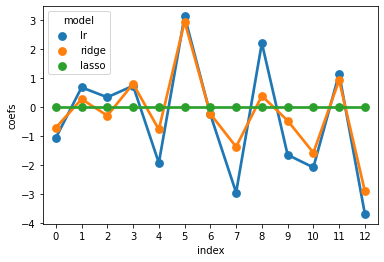

In [212]:
lr = pd.DataFrame({"coefs": linear_regressor.coef_[0], 
                      "model": "lr", 
                      "index": range(0, len(boston_df.columns))})

ridge = pd.DataFrame({"coefs": ridge_large.coef_[0], 
                      "model": "ridge", 
                      "index": range(0, len(boston_df.columns))})

lasso = pd.DataFrame({"coefs": lasso_large.coef_[0], 
                      "model": "lasso", 
                      "index": range(0, len(boston_df.columns))})

perf_compar = pd.concat([lr, ridge, lasso])

import seaborn as sns
s.pointplot(x = 'index',y = 'coefs',hue = 'model', data = perf_compar)